In [3]:
import pandas as pd
data = pd.read_csv('dataset_SCL.csv')
data.head()

/home/lorena/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


#  1) ¿Cómo se distribuyen los datos?

## Reconocimiento y limpieza de datos 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [5]:
import pandas as pd
data['Fecha-I']=pd.DataFrame(data['Fecha-I'])
data['Fecha-I']= pd.to_datetime(data['Fecha-I'])
data['Fecha-I'].dt.date.unique()

array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 2),
       datetime.date(2017, 1, 3), datetime.date(2017, 1, 4),
       datetime.date(2017, 1, 5), datetime.date(2017, 1, 6),
       datetime.date(2017, 1, 7), datetime.date(2017, 1, 8),
       datetime.date(2017, 1, 9), datetime.date(2017, 1, 11),
       datetime.date(2017, 1, 14), datetime.date(2017, 1, 16),
       datetime.date(2017, 1, 18), datetime.date(2017, 1, 21),
       datetime.date(2017, 1, 23), datetime.date(2017, 1, 25),
       datetime.date(2017, 1, 28), datetime.date(2017, 1, 30),
       datetime.date(2017, 1, 10), datetime.date(2017, 1, 12),
       datetime.date(2017, 1, 13), datetime.date(2017, 1, 15),
       datetime.date(2017, 1, 17), datetime.date(2017, 1, 19),
       datetime.date(2017, 1, 22), datetime.date(2017, 1, 24),
       datetime.date(2017, 1, 26), datetime.date(2017, 1, 27),
       datetime.date(2017, 1, 29), datetime.date(2017, 1, 31),
       datetime.date(2017, 1, 20), datetime.date(2017, 2, 4),
  

In [6]:
data['Fecha-I'].dt.hour.unique()

array([23, 22, 13, 21, 14,  0, 10,  9, 16, 19,  8,  7, 17,  6,  1, 11, 12,
       18,  5,  3,  2,  4, 20, 15])

In [7]:
data['Vlo-I'].unique()
data['Vlo-I'] = data['Vlo-I'].astype(str)
data['Vlo-I'].unique()

array(['226', '912', '940', '92', '93', '401', '11', '1011', '1281',
       '1283', '1285', '1287', '1289', '1291', '2291', '98', '116', '176',
       '240', '295', '689', '250', '112', '118', '174', '249', '276',
       '495', '4495', '146', '7661', '7663', '9245', '9268', '9362',
       '6830', '702', '624', '28', '846', '709', '741', '8021', '8023',
       '8027', '8029', '8069', '8073', '8075', '8099', '8125', '8137',
       '8160', '8161', '9601', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '1', '3', '7', '9', '13', '15', '17', '21', '23',
       '25', '41', '43', '51', '53', '55', '61', '71', '73', '75', '81',
       '83', '102', '104', '106', '108', '110', '120', '122', '128',
       '130', '132', '134', '140', '142', '150', '156', '160', '162',
       '164', '166', '170', '172', '180', '182', '184', '186', '188',
       '190', '192', '194', '196', '501', '503', '507', '521', '531',
       '551', '800', '802', '804', '1083', '14', '31', '35', '37', '57',
     

In [8]:
data['Ori-I'].unique()

array(['SCEL'], dtype=object)

In [9]:
data['Des-I'].unique()

array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCVD', 'SCQP', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', 'SBCT', 'SEQM', 'SAZS', 'SAAR', 'SANT', 'YMML', 'SEQU',
       'SANU', 'SAZN', 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB', 'SARI'],
      dtype=object)

In [10]:
data['Emp-I'].unique()

array(['AAL', 'ACA', 'AFR', 'AMX', 'ARG', 'AUT', 'AVA', 'AZA', 'BAW',
       'CMP', 'DAL', 'GLO', 'IBE', 'KLM', 'QFU', 'UAL', 'LAP', 'TAM',
       'SKU', 'LAN', 'LAW', 'JMR', 'LXP', 'LNE', 'LPE', 'DSM', 'PUE',
       'JAT', 'ONE', 'LRC'], dtype=object)

In [12]:
data['Fecha-O']=pd.DataFrame(data['Fecha-O'])
data['Fecha-O']= pd.to_datetime(data['Fecha-O'])
data['Fecha-O'].dt.date.unique()

array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 2),
       datetime.date(2017, 1, 3), datetime.date(2017, 1, 4),
       datetime.date(2017, 1, 5), datetime.date(2017, 1, 7),
       datetime.date(2017, 1, 8), datetime.date(2017, 1, 10),
       datetime.date(2017, 1, 12), datetime.date(2017, 1, 14),
       datetime.date(2017, 1, 16), datetime.date(2017, 1, 18),
       datetime.date(2017, 1, 21), datetime.date(2017, 1, 23),
       datetime.date(2017, 1, 25), datetime.date(2017, 1, 28),
       datetime.date(2017, 1, 30), datetime.date(2017, 1, 6),
       datetime.date(2017, 1, 9), datetime.date(2017, 1, 11),
       datetime.date(2017, 1, 13), datetime.date(2017, 1, 15),
       datetime.date(2017, 1, 17), datetime.date(2017, 1, 19),
       datetime.date(2017, 1, 22), datetime.date(2017, 1, 24),
       datetime.date(2017, 1, 26), datetime.date(2017, 1, 27),
       datetime.date(2017, 1, 29), datetime.date(2017, 1, 31),
       datetime.date(2017, 1, 20), datetime.date(2017, 2, 1),
  

In [13]:
data['Fecha-O'].dt.hour.unique()

array([23,  0, 22, 21, 13, 14, 15, 10, 11, 12,  9, 16, 17, 19, 20,  8,  7,
       18,  6,  1,  5,  3,  2,  4])

In [14]:
data['Vlo-O'].unique()
data['Vlo-O'] = data['Vlo-O'].fillna(9999)
data['Vlo-O'] = data['Vlo-O'].astype(str)
data['Vlo-O'] = data['Vlo-O'].replace({'.0':''}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'':'0000'}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'01':'1'}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'03':'3'}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'04':'4'}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'05':'5'}, regex=True)
#data['Vlo-O'] = data['Vlo-O'].replace(".0","")
data['Vlo-O'].unique()

array(['226', '912', '9', '92', '93', '1', '11', '1281', '1283', '1285',
       '1287', '1289', '1291', '2291', '98', '116', '176', '2', '295',
       '689', '112', '118', '174', '249', '276', '495', '4495', '146',
       '7661', '7663', '9245', '9268', '9362', '68', '624', '28', '846',
       '741', '21', '23', '27', '29', '69', '73', '75', '99', '8125',
       '8137', '81', '8161', '91', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '3', '7', '13', '15', '17', '25', '41', '43', '51',
       '53', '55', '61', '71', '83', '4', '6', '8', '122', '128', '132',
       '134', '142', '156', '162', '164', '166', '172', '182', '184',
       '186', '188', '192', '194', '196', '521', '531', '551', '0', '14',
       '31', '35', '37', '57', '65', '67', '89', '97', '114', '124',
       '126', '136', '138', '144', '148', '152', '154', '168', '178',
       '211', '213', '215', '217', '219', '221', '231', '233', '235',
       '237', '239', '241', '247', '251', '257', '259', '261', '26

In [15]:
data['Ori-O'].unique()

array(['SCEL'], dtype=object)

In [16]:
data['Des-O'].unique()

array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCQP', 'SCVD', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', 'SBCT', 'SEQM', 'SAZS', 'SAAR', 'KIAD', 'SANT', 'YMML',
       'SANU', 'SAZN', 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB'],
      dtype=object)

In [17]:
data['Emp-O'].unique()

array(['AAL', 'ACA', 'AFR', 'AMX', 'ARG', 'AUT', 'AVA', 'AZA', 'BAW',
       'CMP', 'DAL', 'GLO', 'IBE', 'KLM', 'LRC', 'QFA', 'UAL', 'LAP',
       'TAM', 'SKU', 'LAN', 'LXP', 'LNE', 'LPE', 'DSM', '48O', '56R',
       'JMR', 'PUE', 'JAT', 'TPU', 'ONE'], dtype=object)

In [18]:
data['DIA'].unique()

array([ 1,  2,  3,  4,  5,  7,  8, 10, 12, 14, 16, 18, 21, 23, 25, 28, 30,
        6,  9, 11, 13, 15, 17, 19, 22, 24, 26, 27, 29, 31, 20])

In [19]:
data['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [20]:
data['AÑO'].unique()

array([2017, 2018])

In [21]:
data['DIANOM'].unique()

array(['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Sabado',
       'Viernes'], dtype=object)

In [22]:
data['TIPOVUELO'].unique()

array(['I', 'N'], dtype=object)

In [23]:
data['OPERA'].unique()

array(['American Airlines', 'Air Canada', 'Air France', 'Aeromexico',
       'Aerolineas Argentinas', 'Austral', 'Avianca', 'Alitalia',
       'British Airways', 'Copa Air', 'Delta Air', 'Gol Trans', 'Iberia',
       'K.L.M.', 'Qantas Airways', 'United Airlines', 'Grupo LATAM',
       'Sky Airline', 'Latin American Wings', 'Plus Ultra Lineas Aereas',
       'JetSmart SPA', 'Oceanair Linhas Aereas', 'Lacsa'], dtype=object)

In [24]:
data['OPERA'].unique()

array(['American Airlines', 'Air Canada', 'Air France', 'Aeromexico',
       'Aerolineas Argentinas', 'Austral', 'Avianca', 'Alitalia',
       'British Airways', 'Copa Air', 'Delta Air', 'Gol Trans', 'Iberia',
       'K.L.M.', 'Qantas Airways', 'United Airlines', 'Grupo LATAM',
       'Sky Airline', 'Latin American Wings', 'Plus Ultra Lineas Aereas',
       'JetSmart SPA', 'Oceanair Linhas Aereas', 'Lacsa'], dtype=object)

In [25]:
data['SIGLADES'].unique()

array(['Miami', 'Dallas', 'Buenos Aires', 'Toronto', 'Paris',
       'Ciudad de Mexico', 'Bogota', 'Roma', 'Londres',
       'Ciudad de Panama', 'Atlanta', 'Sao Paulo', 'Rio de Janeiro',
       'Florianapolis', 'Madrid', 'Lima', 'Sydney', 'Houston', 'Asuncion',
       'Cataratas Iguacu', 'Puerto Montt', 'Punta Arenas',
       'Puerto Natales', 'Balmaceda', 'Temuco', 'Valdivia', 'Concepcion',
       'La Serena', 'Copiapo', 'Calama', 'Antofagasta', 'Iquique',
       'Arica', 'Mendoza', 'Cordoba', 'Montevideo', 'Castro (Chiloe)',
       'Osorno', 'Orlando', 'Nueva York', 'Guayaquil', 'Cancun',
       'Punta Cana', 'Los Angeles', 'Auckland N.Z.', 'Isla de Pascua',
       'La Paz', 'Santa Cruz', 'Curitiba, Bra.', 'Quito', 'Bariloche',
       'Rosario', 'Washington', 'Tucuman', 'Melbourne', 'San Juan, Arg.',
       'Neuquen', 'Pisco, Peru', 'Ushuia', 'Puerto Stanley',
       'Punta del Este', 'Cochabamba'], dtype=object)

In [26]:
## Distribución por variable

La moda es 2017-12-22


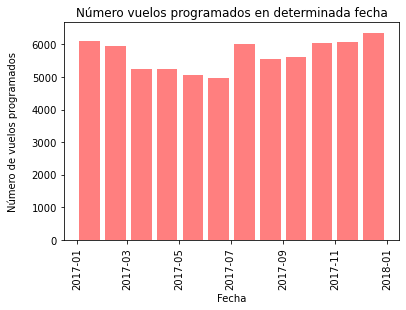

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stat
data['Fecha-I']=pd.DataFrame(data['Fecha-I'])
data['Fecha-I']= pd.to_datetime(data['Fecha-I'])

moda = stat.mode(data['Fecha-I'].dt.date)
print('La moda es '+str(moda))
                        

plt.hist(data['Fecha-I'].dt.date, bins=12, rwidth=0.8, color = 'r', alpha = 0.5)
plt.xticks(rotation = 'vertical')
plt.xlabel('Fecha')
plt.ylabel("Número de vuelos programados", labelpad=14)
plt.title("Número vuelos programados en determinada fecha")
plt.show()

En este plot se aprecia que los vuelos programados aumentan en verano (diciembre, enero, febrero). Los meses con menor número de vuelos programados son marzo, abril, mayo y junio. Hay un alza abrupta en los vuelos en el mes de julio. En la penúltima semana de diciembre se produjo el peak de vuelos programados.

La moda es 7
La mediana es 13.0
La promedio es 12.461249743424332


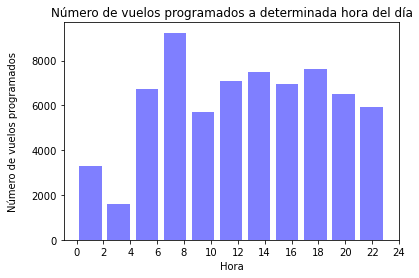

In [31]:
moda = stat.mode(data['Fecha-I'].dt.hour)
mediana = stat.median(data['Fecha-I'].dt.hour)
promedio = stat.mean(data['Fecha-I'].dt.hour)
print('La moda es '+str(moda))
print('La mediana es '+str(mediana))
print('La promedio es '+str(promedio))

plt.hist(data['Fecha-I'].dt.hour, bins=11, rwidth=0.8, color = 'b', alpha = 0.5)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.xlabel('Hora')
plt.ylabel("Número de vuelos programados", labelpad=14)
plt.title("Número de vuelos programados a determinada hora del día")
plt.show()

En este plot se aprecia que la mayor parte de los vuelos se programa entre las 6 y las 8 de la mañana. La moda se produce a las 7 am. La hora media de los vuelos es aproximadamente a las 1 pm. Considero que el valor medio no me entrega información relevante, ya que la dispersión cantidad de vuelos programados entre las 11 am y las 9 pm es baja. Por otro lado, se muestra una considerable disminución de los vuelos programados en la madrugada.

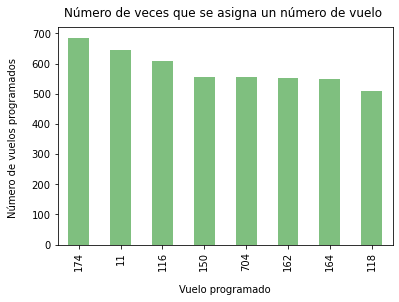

In [32]:
count = data['Vlo-I'].value_counts()
count1 = count[count >= 500]

count1.plot(kind='bar', figsize=(6,4), rot=90, color = 'g', alpha = 0.5)
plt.xlabel("Vuelo programado", labelpad=14)
plt.ylabel("Número de vuelos programados ", labelpad=14)
plt.title("Número de veces que se asigna un número de vuelo ", y=1.02);

No se que información me entrega el número de vuelo, ya que no se si se refiere al avión usado, tipo de vuelo u otro. Por lo tanto, no lo analicé y solo muestré su distribución para los numeros de vuelos programados más de 500 veces. Puedo concluir que hay números de vuelo que se asignan más de 600 veces en el año, mientras que otros solo se usan una vez. 

In [33]:
print(data['Ori-I'].unique(),data['SIGLAORI'].unique() )
print(data['Ori-I'].value_counts())

['SCEL'] ['Santiago']
SCEL    68206
Name: Ori-I, dtype: int64


Todos los vuelos programados del catálogo parten desde Santiago. En total se programaron 68.206 vuelos.

23.754508401020438


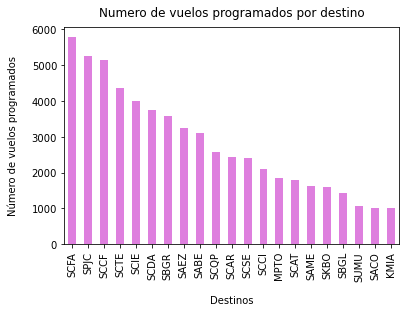

In [34]:
count = data['Des-I'].value_counts()
count1 = count[count >=1000]
count2 = count[count >=5000]
print((count2.sum()/count.sum())*100)


count1.plot(kind='bar', figsize=(6,4), rot=90, color = 'm', alpha = 0.5)
#data['SIGLADES'].value_counts().plot(kind='bar', figsize=(15,6), rot=90, color = 'r')
plt.xlabel("Destinos", labelpad=14)
plt.ylabel("Número de vuelos programados", labelpad=14)
plt.title("Numero de vuelos programados por destino", y=1.02);

En este plot se muestra el número de vuelos programados por destino. Solo se consideran en el plot los destinos con más de 1000 vuelos programados. Tres destinos que destacan con más de 5000 vuelos programados (Antofagasta, Lima y Calama). Estos representan el 23.75% de los vuelos programados en el año.

76.10620766501481
55.14324252998269
20.962965135032107


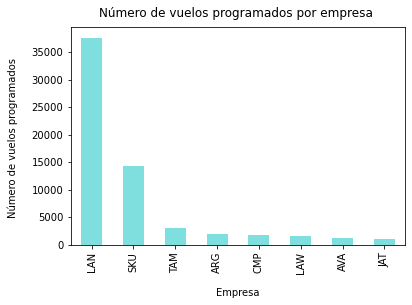

In [35]:
count = data['Emp-I'].value_counts()
count1 = count[count >=1000]
count2 = count[count >=5000]

countlan = count[count >30000]
countsku = count[(count >=10000) & (count <30000)]
print((count2.sum()/count.sum())*100)
print((countlan.sum()/count.sum())*100)
print((countsku.sum()/count.sum())*100)
count1.plot(kind='bar', figsize=(6,4), rot=90, color = 'c', alpha = 0.5)
plt.xlabel("Empresa",  labelpad=14)
plt.ylabel("Número de vuelos programados ", labelpad=14)
plt.title("Número de vuelos programados por empresa ", y=1.02);

En este plot se muestra el número de vuelos programados por empresa. Solo se consideran en el plot las empresas con más de 1000 vuelos programados. También, se puede ver que LAN y SKU presentan más del 76% de vuelos programados, con un 55% y 21% respectivamente.

La moda es 2017-12-22


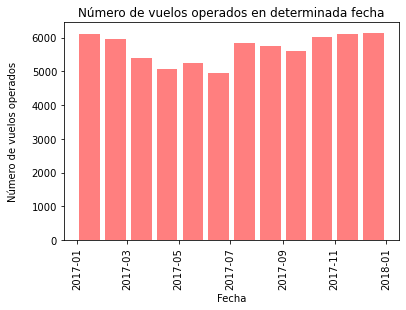

In [36]:

data['Fecha-O']=pd.DataFrame(data['Fecha-O'])
data['Fecha-O']= pd.to_datetime(data['Fecha-O'])
moda = stat.mode(data['Fecha-O'].dt.date)
print('La moda es '+str(moda))

plt.hist(data['Fecha-O'].dt.date, bins=12, rwidth=0.8, color = 'r', alpha = 0.5)
plt.xticks(rotation = 'vertical')
plt.xlabel('Fecha')
plt.ylabel("Número de vuelos operados", labelpad=14)
plt.title("Número de vuelos operados en determinada fecha")
plt.show()

La distribución de las fechas de los vuelos programados y operados es similar.

La moda es 7
La mediana es 13.0
La promedio es 12.457041902471923


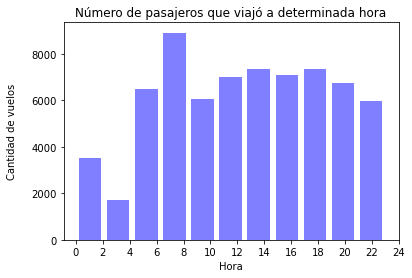

In [37]:
moda = stat.mode(data['Fecha-O'].dt.hour)
mediana = stat.median(data['Fecha-O'].dt.hour)
promedio = stat.mean(data['Fecha-O'].dt.hour)
print('La moda es '+str(moda))
print('La mediana es '+str(mediana))
print('La promedio es '+str(promedio))

plt.hist(data['Fecha-O'].dt.hour, bins=11, rwidth=0.8, color = 'b', alpha = 0.5)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.xlabel('Hora')
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Número de pasajeros que viajó a determinada hora")
plt.show()

La distribución de la hora de los vuelos programados y operados es similar.

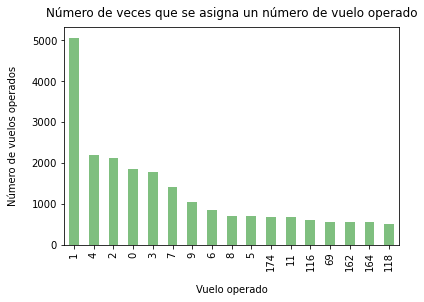

In [38]:
count = data['Vlo-O'].value_counts()
count1 = count[count >= 500]

count1.plot(kind='bar', figsize=(6,4), rot=90, color = 'g', alpha = 0.5)
plt.xlabel("Vuelo operado",  labelpad=14)
plt.ylabel("Número de vuelos operados", labelpad=14)
plt.title("Número de veces que se asigna un número de vuelo operado", y=1.02);

El número de los vuelos programados y operados cambia significativamente. No sabría decir por qué cambia este valor.

In [39]:
print(data['Ori-O'].unique(),data['SIGLAORI'].unique() )
print(data['Ori-O'].value_counts())

['SCEL'] ['Santiago']
SCEL    68206
Name: Ori-O, dtype: int64


23.754508401020438


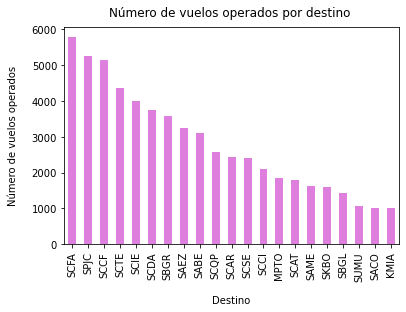

In [40]:
count = data['Des-O'].value_counts()
count1 = count[count >=1000]
count2 = count[count >=5000]
print((count2.sum()/count.sum())*100)

count1.plot(kind='bar', figsize=(6,4), rot=90, color = 'm', alpha = 0.5)
plt.xlabel("Destino",  labelpad=14)
plt.ylabel("Número de vuelos operados", labelpad=14)
plt.title("Número de vuelos operados por destino ", y=1.02);

El destino de los vuelos programados y operados se mantiene.

68206
55.80282364201962
30.771486379497404
73.07861478462306


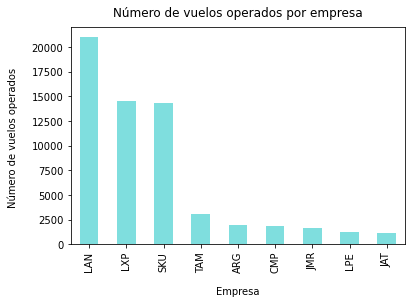

In [41]:
count = data['Emp-O'].value_counts()
print(count.sum())
count1 = count[count >=1000]
count2 = count[count >=5000]
countlan = count[count >20000]

print((countlan.sum()/37611)*100)
print((countlan.sum()/count.sum())*100)
print((count2.sum()/count.sum())*100)

count1.plot(kind='bar', figsize=(6,4), rot=90, color = 'c', alpha = 0.5)
plt.xlabel("Empresa",  labelpad=14)
plt.ylabel("Número de vuelos operados ", labelpad=14)
plt.title("Número de vuelos operados por empresa", y=1.02);

En este plot se muestra el número de vuelos operados por empresa. Se puede ver que LAN, LXP y SKU presentan más del 73% de vuelos operados, valor que disminuye en un 3% con respecto a los vuelos programados por las dos primeras. También, podemos concluir que alrededor de un 55.8% de los vuelos programados por LAN son operados por su filial LXP.

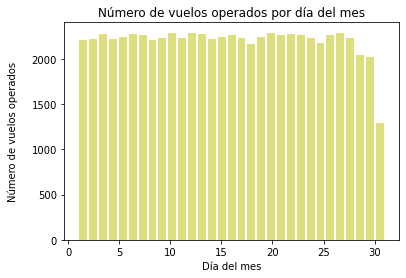

In [42]:
plt.hist(data['DIA'], bins=31, rwidth=0.8, color = 'y', alpha = 0.5)
plt.xlabel('Día del mes')
plt.ylabel("Número de vuelos operados", labelpad=14)
plt.title("Número de vuelos operados por día del mes")
plt.show()

Los días del mes en el que se operan los vuelos no presenta una gran dispersión. Los últimos tres días del mes presentan una menor cantidad de vuelos operados. La disminución de vuelos de los días 29,30 y 31 puede deberse a que el mes de febrero solo tiene 28 días y a que solo mes por medio tenemos día 31.

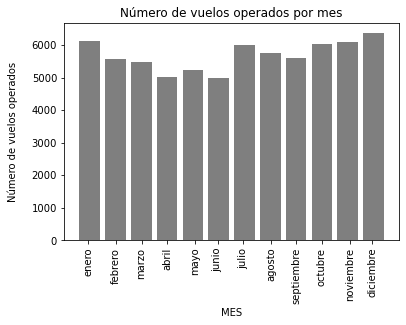

In [43]:
plt.hist(data['MES'], bins=12, rwidth=0.8, color = 'k', alpha = 0.5)
plt.xlabel('MES')
plt.ylabel('Número de vuelos operados', labelpad=14)
plt.xticks([1.4,2.4,3.3,4.2,5.2,6,6.9,7.9,8.8,9.7,10.7,11.5],['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre'], rotation = 'vertical')
plt.title("Número de vuelos operados por mes")
plt.show()

Se comporta igual que Fecha-O

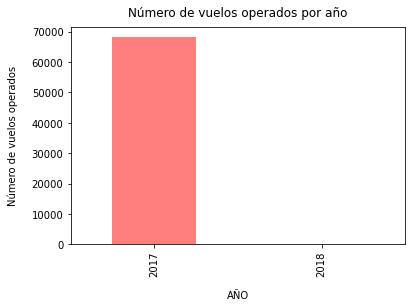

In [44]:
data['AÑO'].value_counts().plot(kind='bar', figsize=(6,4), rot=90, color = 'r', alpha = 0.5)
plt.xlabel("AÑO", labelpad=14)
plt.ylabel("Número de vuelos operados", labelpad=14)
plt.title("Número de vuelos operados por año", y=1.02);

Solo contamos con datos del año 2017

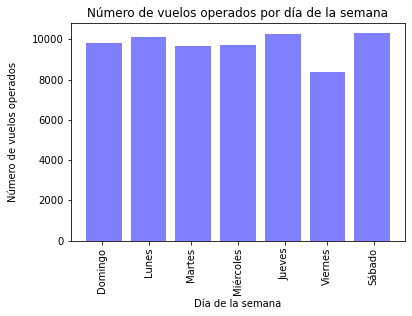

In [45]:
plt.hist(data['DIANOM'], bins=7, rwidth=0.8, color = 'b', alpha = 0.5)
plt.xlabel('Día de la semana')
plt.xticks([0.4,1.3,2.1,3,3.9,4.7,5.6],['Domingo','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado'], rotation = 'vertical')
plt.ylabel("Número de vuelos operados", labelpad=14)
plt.title("Número de vuelos operados por día de la semana")
plt.show()

No hay una gran dispersión en la cantidad de vuelos operados por día de la semana. El día que presenta menor número de vuelos y que sabe levemente de la media es el viernes.

54.19757792569568 45.80242207430431


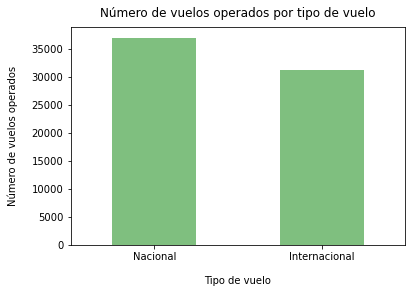

In [46]:
count = data['TIPOVUELO'].value_counts()
num = count['N'] + count['I']
N = (count['N']/num)*100
I = (count['I']/num)*100
print(N,I)
data['TIPOVUELO'].value_counts().plot(kind='bar', figsize=(6,4), rot=90, color = 'g', alpha = 0.5)
plt.xticks([0,1],['Nacional','Internacional'], rotation = 'horizontal')
plt.xlabel("Tipo de vuelo", labelpad=14)
plt.ylabel("Número de vuelos operados", labelpad=14)
plt.title("Número de vuelos operados por tipo de vuelo", y=1.02);

Los vuelos se dividen en nacionales e internacionales con un 54% y un 45% respectivamente.

68206
20.962965135032107
59.95366976512331


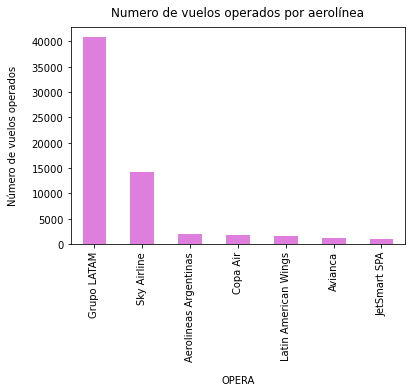

In [47]:
count = data['OPERA'].value_counts()
print(count.sum())
count1 = count[count >=1000]
countsku = count[(count >=5000) & (count <=15000)]
countlan = count[count >20000]

print((countsku.sum()/count.sum())*100)
print((countlan.sum()/count.sum())*100)


count1.plot(kind='bar', figsize=(6,4), rot=90, color = 'm', alpha = 0.5)
plt.xlabel("OPERA", labelpad=14)
plt.ylabel("Número de vuelos operados", labelpad=14)
plt.title("Numero de vuelos operados por aerolínea", y=1.02);

El resultado es casi igual al del número de vuelos programados por empresa. En este plot se muestra el número de vuelos de LAN y TAM juntos como Grupo LATAM.

33.04254757645955


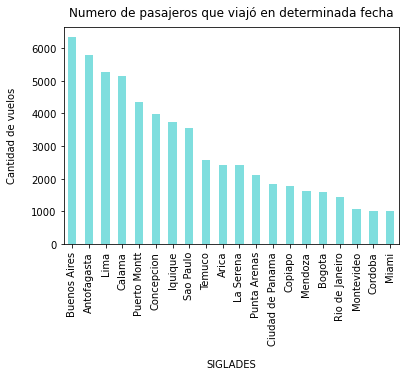

In [48]:
count = data['SIGLADES'].value_counts()
count1 = count[count >=1000]
count2 = count[count >=5000]
print((count2.sum()/count.sum())*100)

count1.plot(kind='bar', figsize=(6,4), rot=90, color = 'c', alpha = 0.5)
plt.xlabel("SIGLADES", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

En este plot se muestra el número de vuelos operados por destino. El número de vuelos es similar al mostrado en el en plot de vuelos programados por destino. En el plot de número de vuelos por destino programado no aparece Buenos Aires como uno de los destino principales, sin embargo esto se debe a que los vuelos a esta ciudad aterrizan en distintos aeropuertos (SAEZ y SABE). 
Es importante tener en cuenta que variables se quiere estudiar, si la cuidad de destino o el aeropuerto de arribo.

In [49]:
print(data['Ori-O'].unique(),data['SIGLAORI'].unique() )
print(data['Ori-O'].value_counts())

['SCEL'] ['Santiago']
SCEL    68206
Name: Ori-O, dtype: int64


In [50]:
data.corr()

,DIA,MES,AÑO
DIA,1.000000,0.014318,-0.009073
MES,0.014318,1.000000,-0.008642
AÑO,-0.009073,-0.008642,1.000000


## 2) Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 

### temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.



In [51]:
import numpy as np

data['temporada_alta'] = np.where(((data['Fecha-I'] < '2017-03-04') & (data['Fecha-I'] >= '2017-01-01')) |
                                  ((data['Fecha-I'] < '2017-08-01') & (data['Fecha-I'] >= '2017-07-15')) |
                                  ((data['Fecha-I'] < '2017-10-01') & (data['Fecha-I'] >= '2017-09-11')) |
                                  ((data['Fecha-I'] < '2018-01-01') & (data['Fecha-I'] >= '2017-12-15')),1,0)
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha-O-split,Hora-O-split,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01,23:33:00,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02,23:39:00,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,2017-01-03,23:39:00,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04,23:33:00,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,2017-01-05,23:28:00,1


### dif_min : diferencia en minutos entre Fecha-O y Fecha-I

In [52]:
data['Fecha-O']=pd.DataFrame(data['Fecha-O'])
data['Fecha-O']= pd.to_datetime(data['Fecha-O'])
data['Fecha-I']=pd.DataFrame(data['Fecha-I'])
data['Fecha-I']= pd.to_datetime(data['Fecha-I'])
data['dif_min'] = (data['Fecha-O']- data['Fecha-I'])
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha-O-split,Hora-O-split,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01,23:33:00,1,0 days 00:03:00
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02,23:39:00,1,0 days 00:09:00
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,2017-01-03,23:39:00,1,0 days 00:09:00
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04,23:33:00,1,0 days 00:03:00
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,2017-01-05,23:28:00,1,-1 days +23:58:00


### atraso_15 : 1 si dif_min > 15, 0 si no.

In [53]:
data['atraso_15'] = np.where(data['dif_min'].dt.seconds/60. > 15, 1,0)
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha-O-split,Hora-O-split,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,2017-01-01,23:33:00,1,0 days 00:03:00,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,2017-01-02,23:39:00,1,0 days 00:09:00,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,2017-01-03,23:39:00,1,0 days 00:09:00,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04,23:33:00,1,0 days 00:03:00,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,2017-01-05,23:28:00,1,-1 days +23:58:00,1


### periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [54]:
import datetime

data['periodo_dia'] = np.where( (data['Fecha-I'].dt.time > datetime.time(5,0,0)) & (data['Fecha-I'].dt.time < datetime.time(12,0,0)) , 'mañana', '')
        
ntarde = np.where( (data['Fecha-I'].dt.time > datetime.time(12,0,0)) & (data['Fecha-I'].dt.time < datetime.time(18,0,0)))
nnoche = np.where( (data['Fecha-I'].dt.time > datetime.time(18,0,0)) | ((data['Fecha-I'].dt.time > datetime.time(0,0,0) )& (data['Fecha-I'].dt.time < datetime.time(4,59,59)))) 
for i in ntarde:
    data.loc[i, 'periodo_dia'] = 'tarde'
for i in nnoche:
    data.loc[i, 'periodo_dia'] = 'noche'
print(data.head())
data.to_csv('synthetic_features.csv')


              Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...  TIPOVUELO              OPERA  SIGLAORI SIGLADES  \
0  KMIA   AAL  ...          I  American Airlines  Santiago    Miami   
1  KMIA   AAL  ...          I  American Airlines  Santiago    Miami   
2  KMIA   AAL  ...          I  American Airlines  Santiago    Miami   
3  KMIA   AAL  ...          I  American Airlines  Santiago    Miami   
4  KMIA   AAL  ...          I  American Airlines  Santiago    Miami   

  Fecha-O-split Hora-O-split temporada_alta           dif_min atraso_15  \
0    2017-0

## 3 ) ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

definiendo la tasa de atraso como

$Tasa \; de \; atraso = \frac{Número \;de \; vuelos \; atrasados \; por \; variable}{Número \; total \; de \; vuelos \; por \; vatiable}$

donde el numerador corresponde al número de vuelos de cada variable etiquetados con un 1 en la columna atraso_15 creada en el paso anterior

0.44800588255051266
0.476056474751318


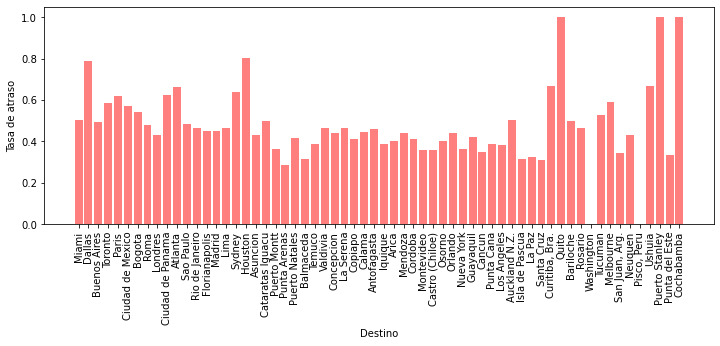

In [69]:
import matplotlib.pyplot as plt
data = pd.read_csv('synthetic_features.csv')
variables = data['SIGLADES'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['SIGLADES'] == str(i)]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)
#print(des,tasa)

mediana = np.median(tasa)
promedio = np.mean(tasa)

print(mediana)
print(promedio)
fig = plt.figure(figsize = (12,4))

plt.bar(var, tasa, color = 'r', alpha = 0.5)
plt.xlabel('Destino')
plt.ylabel('Tasa de atraso')
plt.xticks(rotation='vertical')

plt.show()

La tasa de atraso varía bastante según el destino del vuelo. Los valores que llegan a tener una tasa de atras igual a 1 es porque solo cuentan con un vuelo y este se atrasó más de 15 minutos. El valor medio de la tasa de atraso es 0.44. Elegí la media, es más resistente a outliers.

0.6201117318435754
0.601751173745405


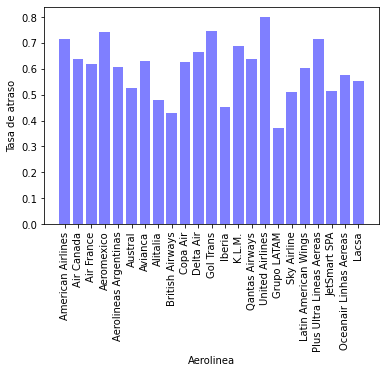

In [70]:
variables = data['OPERA'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['OPERA'] == str(i)]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)

mediana = np.median(tasa)
promedio = np.mean(tasa)

print(mediana)
print(promedio)
fig = plt.figure(figsize = (6,4))

plt.bar(var, tasa, color = 'b', alpha = 0.5)
plt.xlabel('Aerolinea')
plt.ylabel('Tasa de atraso')
plt.xticks(rotation='vertical')
plt.show()

La tasa de atraso varía bastante según la aerolínea. La mediana de la tasa de atraso es 0.62. Grupo LATAM presenta la tasa de atraso más baja, mientras que United Airlines tiene la tasa más alta, seguida por Aeromexico y Gold Trans

0.44844834626378116
0.44761090449966545


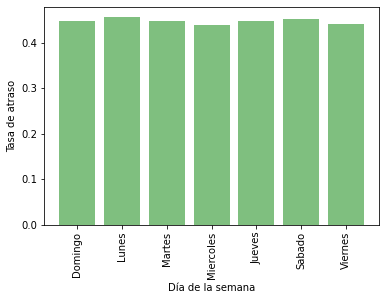

In [71]:
variables = data['DIANOM'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['DIANOM'] == str(i)]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)
mediana = np.median(tasa)
promedio = np.mean(tasa)

print(mediana)
print(promedio)
#print(des,tasa)
fig = plt.figure(figsize = (6,4))

plt.bar(var, tasa, color = 'g', alpha = 0.5)
plt.xlabel('Día de la semana')
plt.ylabel('Tasa de atraso')
plt.xticks(rotation='vertical')
plt.show()

La tasa de atraso es constante para los días de la semana

0.44780508540243
0.44780508540243


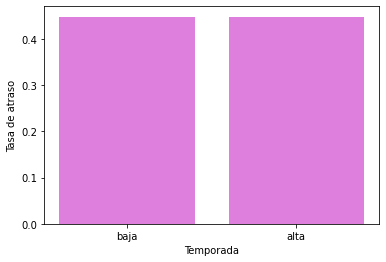

In [74]:
variables = data['temporada_alta'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['temporada_alta'] == i]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)
    
mediana = np.median(tasa)
promedio = np.mean(tasa)

print(mediana)
print(promedio)
#print(des,tasa)
fig = plt.figure(figsize = (6,4))

plt.bar(var, tasa, color = 'm', alpha = 0.5)
plt.xlabel('Temporada')
plt.ylabel('Tasa de atraso')
plt.xticks([1,0], ['alta','baja'])
#plt.xticks(['alta','baja'],rotation='vertical')
plt.show()

La tasa de atraso es constante en dstintas temporadas

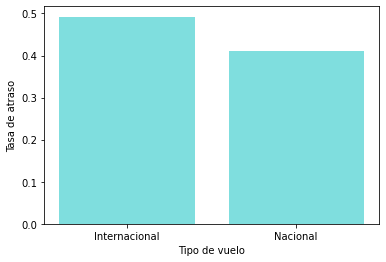

In [66]:
variables = data['TIPOVUELO'].unique()

var,tasa   = [], []

for i in variables:
    var.append(i)
    variable = data[data['TIPOVUELO'] == i]
    atraso  = variable[variable['atraso_15'] == 1]
    lendes = len(variable['Fecha-I'])
    lenatr = len(atraso['Fecha-I'])
    tasa.append(lenatr/lendes)
#print(des,tasa)
fig = plt.figure(figsize = (6,4))

plt.bar(var, tasa, color = 'c', alpha = 0.5)
plt.xlabel('Tipo de vuelo')
plt.ylabel('Tasa de atraso')
plt.xticks([1,0], ['Nacional','Internacional'])
#plt.xticks(['alta','baja'],rotation='vertical')
plt.show()

La tasa de atraso es mayor en los vuelos internacionales

### ¿Qué variables esperarías que más influyeran en predecir atrasos?

Según el análisis anterior esperaría que de las variables que influyan más en un modelo que prediga la probabilidad de atraso de los vuelos sean el destino de vuelo, la aerolinea y el tipo de vuelo, ya que presentan mayor dependencia con la tasa de atraso.